<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

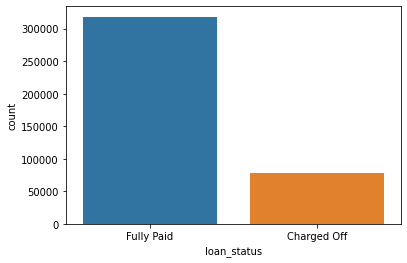

In [9]:
# CODE HERE
sns.countplot(x = df["loan_status"])

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

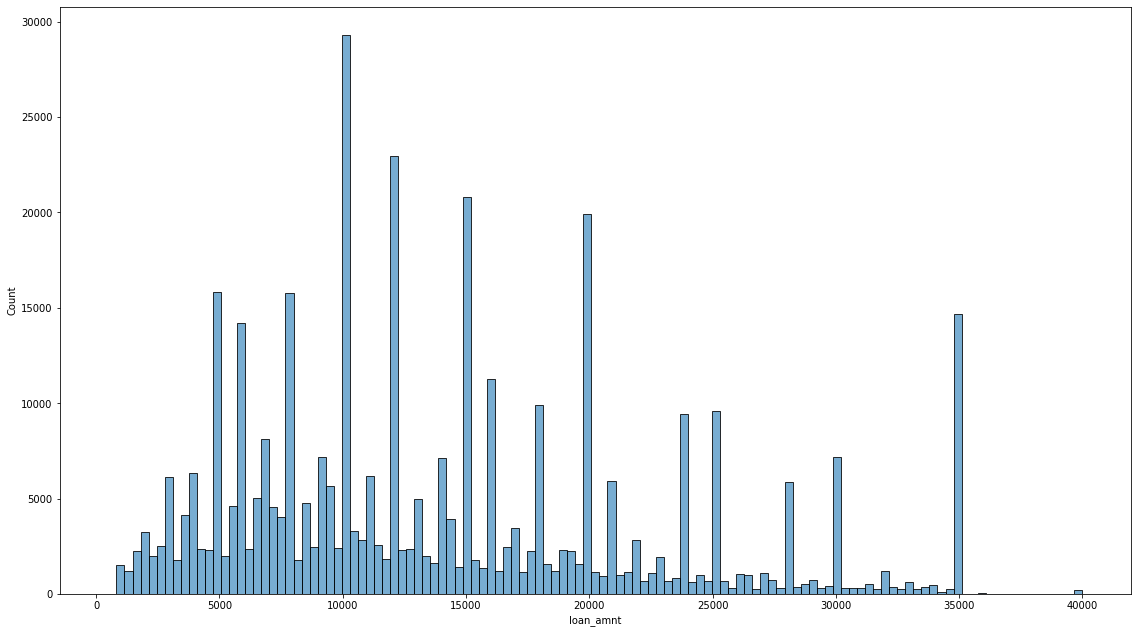

In [10]:
# CODE HERE
plt.figure(figsize = (19.2, 10.8))
sns.histplot(df["loan_amnt"], alpha = 0.6)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [11]:
# CODE HERE
df.corr()["loan_amnt"].sort_values(ascending = False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<AxesSubplot:>

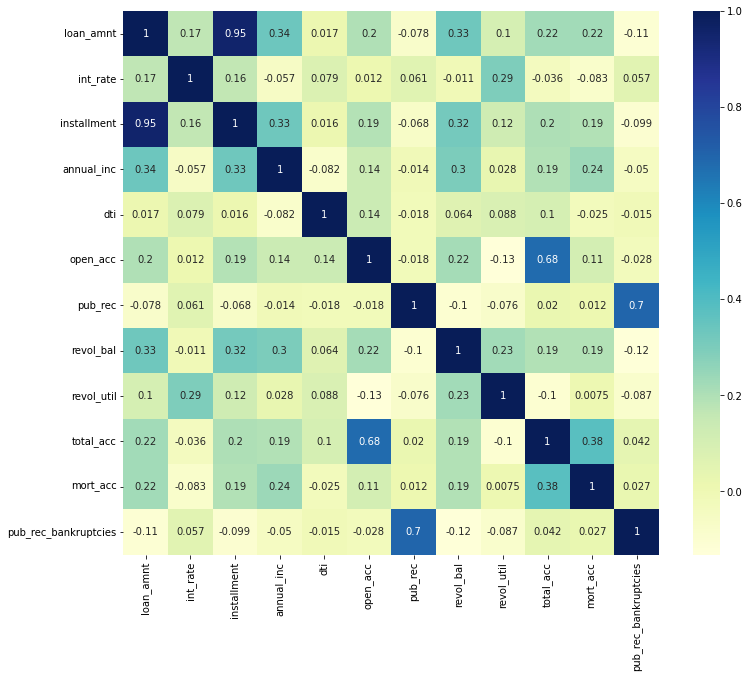

In [12]:
# CODE HERE
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)


**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

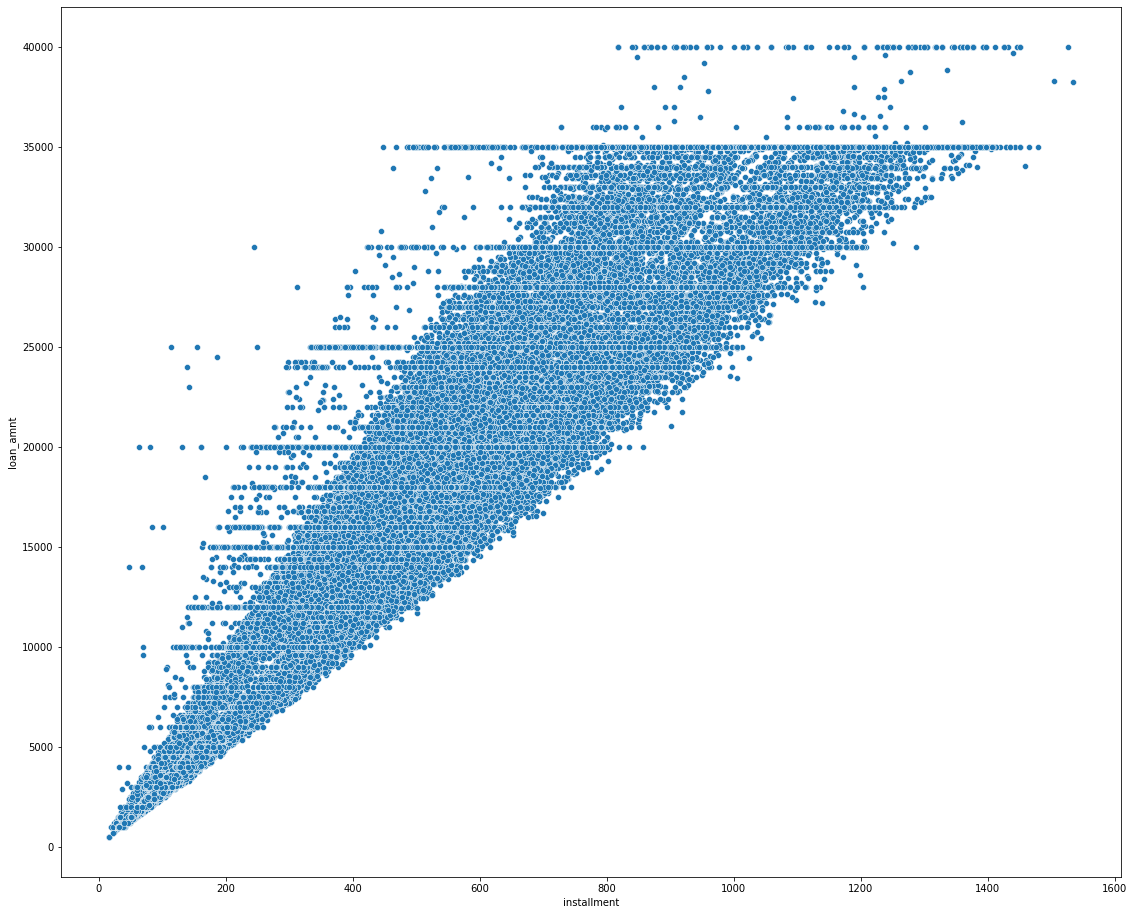

In [13]:
# CODE HERE

plt.figure(figsize = (19, 16))
sns.scatterplot(x = df["installment"], y = df["loan_amnt"])

In [14]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

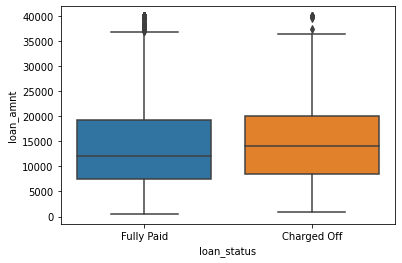

In [16]:
# CODE HERE
sns.boxplot(x = df["loan_status"], y = df["loan_amnt"])

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [17]:
# CODE HERE
df.groupby("loan_status").describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [18]:
# CODE HERE
print(df["grade"].sort_values().unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [19]:
# CODE HERE
print(df["sub_grade"].sort_values().unique())

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


In [20]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

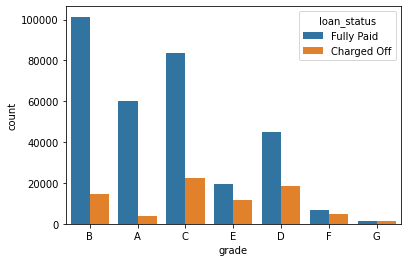

In [21]:
# CODE HERE
sns.countplot(x = df["grade"], hue = df["loan_status"])

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

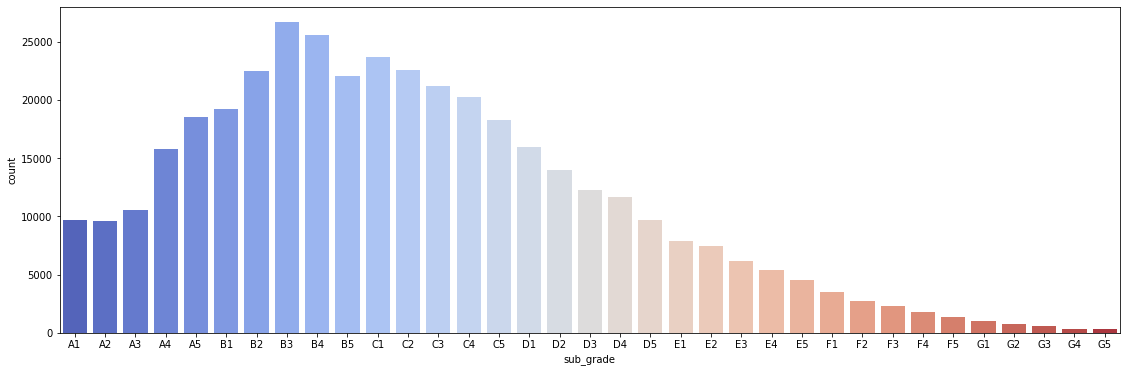

In [22]:
#CODE HERE
plt.figure(figsize = (19, 6))
sns.countplot(x = df["sub_grade"].sort_values(ascending = True), palette = "coolwarm", alpha = 1)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

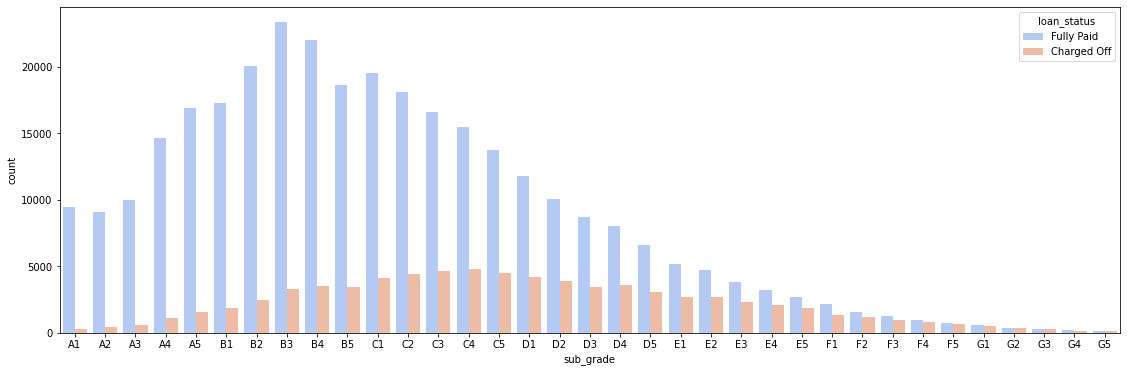

In [23]:
#CODE HERE
plt.figure(figsize = (19, 6))
sns.countplot(x = df["sub_grade"].sort_values(ascending = True), palette = "coolwarm", alpha = 1, hue = df["loan_status"])

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [24]:
fg = df["sub_grade"].sort_values().unique()[25:]

In [25]:
def fgIsolate(input):
    if input in fg:
        return input
    




In [26]:
#fgIsolated = 
fgIsolated = pd.DataFrame()
fgIsolated["sub_grades_fg"] = df["sub_grade"].apply(fgIsolate)
fgIsolated = pd.concat([df, fgIsolated], axis = 1).drop("sub_grade", axis = 1).dropna(axis = 0).reset_index(drop = True)


In [27]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='sub_grades_fg', ylabel='count'>

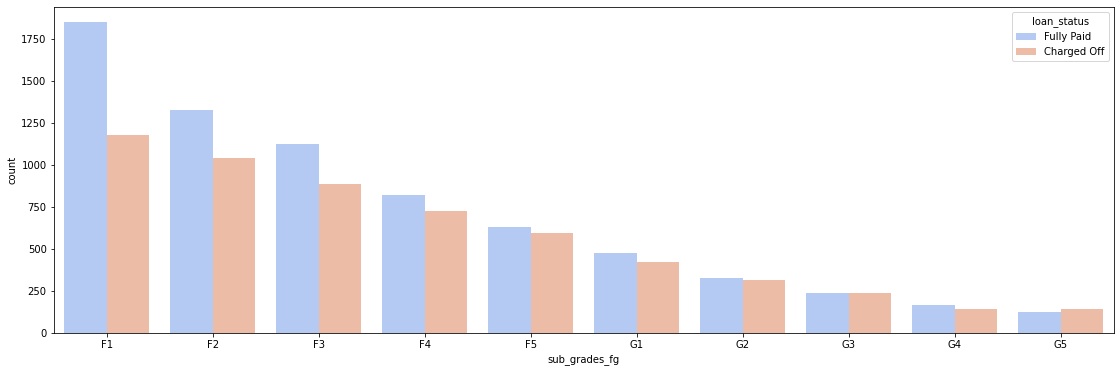

In [28]:
# CODE HERE
plt.figure(figsize = (19, 6))
sns.countplot(x = fgIsolated["sub_grades_fg"].sort_values(), palette = "coolwarm", hue = fgIsolated["loan_status"])

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [29]:
# CODE HERE
def repaid(input):
    if(input == "Fully Paid"):
        return 1
    elif(input == "Charged Off"):
        return 0
df["loan_repaid"] = df["loan_status"].apply(repaid)
df["loan_repaid"].sum()

318357

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [30]:
df.corr()["loan_repaid"].sort_values(ascending = False)[1:]

mort_acc                0.073111
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009383
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082373
int_rate               -0.247758
Name: loan_repaid, dtype: float64

<AxesSubplot:>

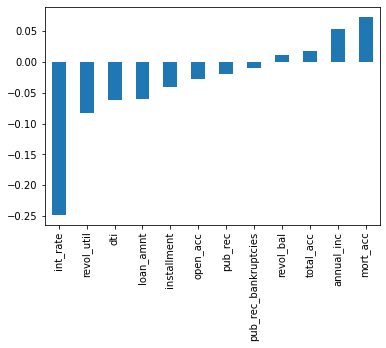

In [31]:
df.corr()["loan_repaid"].sort_values(ascending = False)[1:].sort_values(ascending = True).plot(kind = "bar")

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [32]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
df.shape

(396030, 28)

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [34]:
# CODE HERE
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [35]:
# CODE HERE
((df.isna().sum() / len(df))*100).sort_values(ascending = False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
address                 0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [36]:
# CODE HERE

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [37]:
# CODE HERE
df["emp_title"]

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
396026                       Agent
396027                City Carrier
396028        Gracon Services, Inc
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [38]:
feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


In [39]:
df["emp_length"]

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [40]:
feat_info("emp_length")

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [41]:
# CODE HERE
len(df["emp_title"].unique())

173106

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [42]:
# CODE HERE
df.drop("emp_title", axis = 1, inplace = True)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

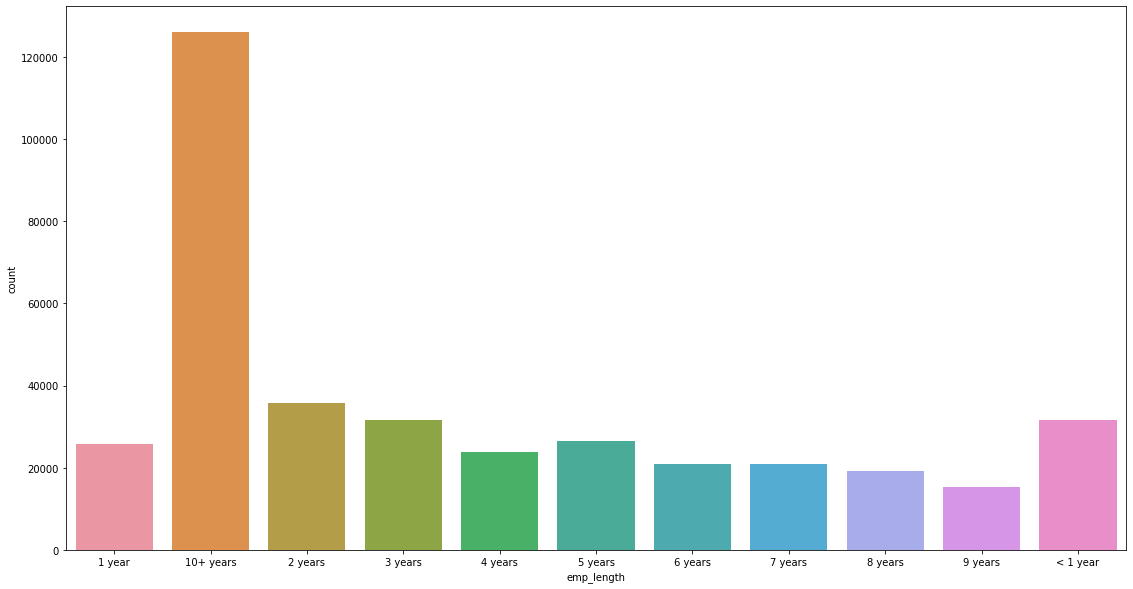

In [43]:
# CODE HERE
plt.figure(figsize = (19, 10))
sns.countplot(x = df["emp_length"].dropna(axis = 0).sort_values())

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [44]:
# CODE HERE

<AxesSubplot:xlabel='emp_length', ylabel='count'>

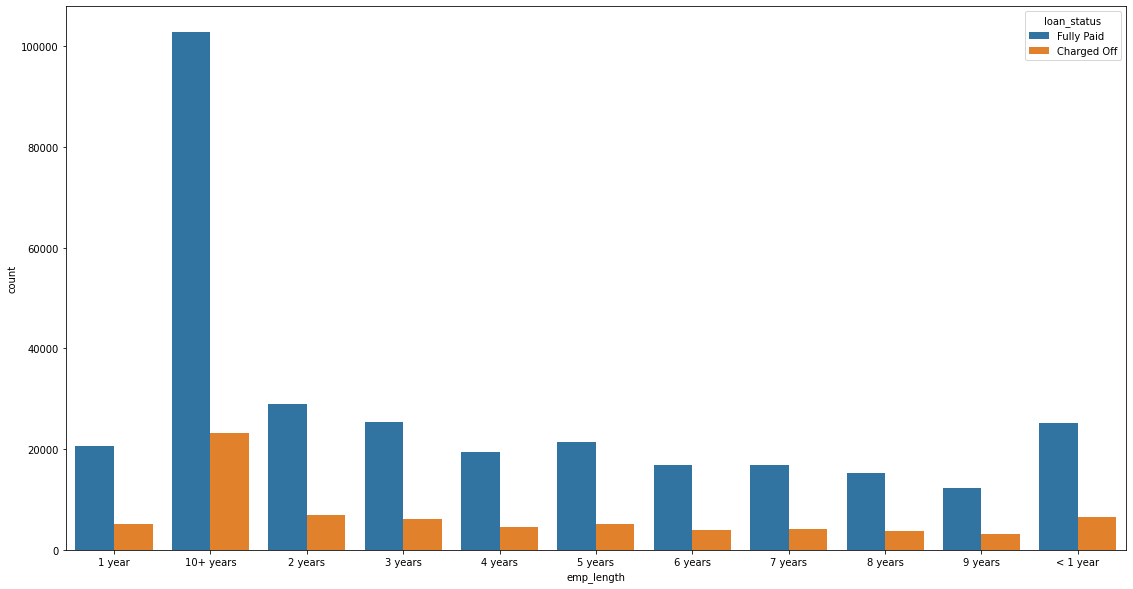

In [45]:
# CODE HERE
plt.figure(figsize = (19, 10))
sns.countplot(x = df["emp_length"].dropna(axis = 0).sort_values(), hue = df["loan_status"])

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [46]:
# CODE HERE
final = pd.DataFrame()
final["count"] = df["emp_length"]
final["loan_repaid"] = df["loan_repaid"]
final["loan_not_repaid"] = df["loan_repaid"] != 1

In [47]:
final = final.groupby("count").sum()
final["factor"] = final["loan_not_repaid"]/(final["loan_repaid"])

In [48]:
final

,loan_repaid,loan_not_repaid,factor
count,,,
1 year,20728,5154,0.248649
10+ years,102826,23215,0.225770
2 years,28903,6924,0.239560
3 years,25483,6182,0.242593
4 years,19344,4608,0.238213
5 years,21403,5092,0.237911
6 years,16898,3943,0.233341
7 years,16764,4055,0.241887
8 years,15339,3829,0.249625


<AxesSubplot:xlabel='count'>

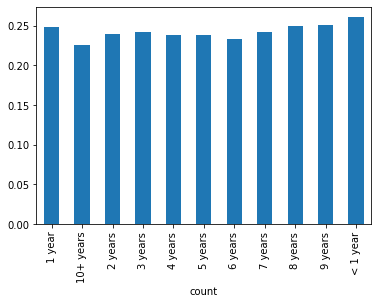

In [49]:
final["factor"].plot(kind = "bar")

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [50]:
# CODE HERE
df.drop("emp_length", axis = 1, inplace = True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [51]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [52]:
# CODE HERE
print(df[df["title"] == df["purpose"]]["title"].reset_index(drop = True).unique())

['debt_consolidation' 'vacation' 'car' 'major_purchase' 'small_business'
 'medical' 'credit_card' 'other' 'moving' 'home_improvement' 'wedding'
 'house' 'renewable_energy']


In [53]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [54]:
# CODE HERE
df.drop("title", axis = 1, inplace = True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [55]:
# CODE HERE
feat_info("mort_acc")

Number of mortgage accounts.


In [56]:
df["mort_acc"].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

**TASK: Create a value_counts of the mort_acc column.**

In [57]:
# CODE HERE
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [58]:
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [59]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [60]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [61]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [62]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [63]:
# CODE HERE
df = df.dropna(axis = 0)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [64]:
# CODE HERE
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [65]:
# CODE HERE
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [66]:
df["term"] = df["term"].apply(lambda term: int(term[:3]))

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [67]:
# CODE HERE
df.drop("grade", axis = 1, inplace = True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [68]:
# CODE HERE
subGrades = pd.get_dummies(df["sub_grade"], drop_first = True)
df = pd.concat([subGrades, df], axis = 1).drop("sub_grade", axis = 1)

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [69]:
# CODE HERE
df = pd.concat([df, pd.get_dummies(df[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first = True)], axis = 1)

In [70]:
df = df.drop((["verification_status", "application_type", "initial_list_status", "purpose"]), axis = 1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [71]:
#CODE HERE
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [72]:
def hmOwnership(input):
    if input == "NONE" or input == "ANY" or input == "OTHERS":
        return "OTHER"
    
    else:
        return input

In [73]:
#CODE HERE
df["home_ownership"].apply(hmOwnership).value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [74]:
df = pd.concat([df, pd.get_dummies(df["home_ownership"], drop_first = True)], axis = 1).drop("home_ownership", axis = 1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [75]:
#CODE HERE
def zipExtracter(input):
    return input[-5:]

In [76]:
df["zip_code"] = df["address"].apply(zipExtracter)

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [77]:
df = pd.concat([df, pd.get_dummies(df["zip_code"], drop_first = True)], axis = 1).drop("zip_code", axis = 1)

In [78]:
df.drop("address", inplace = True, axis = 1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [79]:
df.columns

Index(['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'loan_amnt',
       'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'MORTGAGE', 'NO

In [80]:
#CODE HERE
df.drop("issue_d", axis = 1, inplace = True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [81]:
#CODE HERE
def yearExtracter(input):
    return int(input[-4:])

In [82]:

df["year"] = df["earliest_cr_line"].apply(yearExtracter)

In [83]:
df.drop("earliest_cr_line", axis = 1, inplace = True)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [84]:
from sklearn.model_selection import train_test_split
df.drop("loan_status", axis = 1, inplace = True)
X = df.drop("loan_repaid", axis = 1).values
y = df["loan_repaid"].values

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [85]:
# CODE HERE
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [86]:
df.select_dtypes(["object"]).columns

Index([], dtype='object')

**TASK: Set X and y variables to the .values of the features and label.**

In [87]:
#CODE HERE

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [88]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [89]:
#CODE HERE


## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [90]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

NameError: name 'stop' is not defined

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

2022-09-22 04:12:01.104406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 04:12:01.653739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 04:12:01.653772: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 04:12:01.722392: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 04:12:03.452881: W tensorflow/stream_executor/platform/de

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [93]:
df.shape

(395219, 81)

In [94]:
# CODE HERE
model = Sequential()

model.add(Dense(81, activation = "relu"))
model.add(Dense(21, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")


2022-09-22 04:14:33.592218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-22 04:14:33.593001: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-22 04:14:33.593068: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ArdentNoir): /proc/driver/nvidia/version does not exist
2022-09-22 04:14:33.593828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [95]:
# CODE HERE
model.fit(x = XTrain, y = yTrain, epochs = 25, batch_size = 256, validation_data = (XTest, yTest))

Epoch 1/25
1236/1236 [==============================] - 4s 2ms/step - loss: 0.2844 - val_loss: 0.2617
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2633 - val_loss: 0.2604
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2613 - val_loss: 0.2618
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2600 - val_loss: 0.2576
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2594 - val_loss: 0.2599
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2584 - val_loss: 0.2572
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2581 - val_loss: 0.2570
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2576 - val_loss: 0.2576
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2573 - val_loss: 0.2571
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.256

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2959 - val_loss: 0.2652
Epoch 2/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2652 - val_loss: 0.2643
Epoch 3/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2628 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2613 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2603 - val_loss: 0.2618
Epoch 7/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 3s 10us/sample - 

**TASK: OPTIONAL: Save your model.**

<AxesSubplot:>

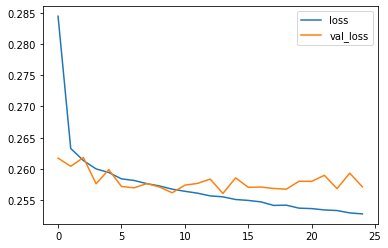

In [100]:
# CODE HERE
erorr = pd.DataFrame(model.history.history)
erorr.plot()

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [109]:
# CODE HERE
def predictLabeliser(input):
    if(input):
        return 1
    else:
        return 0
    
predict = pd.DataFrame(model.predict(XTest) > 0.5, columns = ["loan_repaid_pred"])
predict

2471/2471 [==============================] - 3s 1ms/step


,loan_repaid_pred
0,False
1,True
2,True
3,True
4,True
...,...
79039,True
79040,True
79041,True
79042,True


In [105]:
predict.value_counts()

True     71187
False     7857
dtype: int64

In [112]:
predict = predict * 1

In [110]:
df["loan_repaid"].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

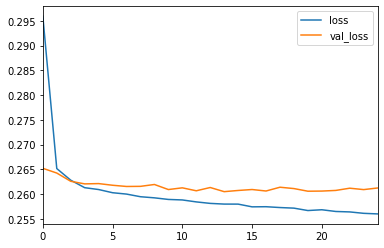

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [113]:
# CODE HERE
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
print(classification_report(yTest, predict))

              precision    recall  f1-score   support

           0       0.93      0.47      0.63     15438
           1       0.89      0.99      0.94     63606

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [115]:
print(confusion_matrix(yTest, predict))

[[ 7289  8149]
 [  568 63038]]


array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [127]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
print(new_customer.loc[:])

A2          0.0
A3          0.0
A4          0.0
A5          0.0
B1          0.0
          ...  
48052       0.0
70466       0.0
86630       0.0
93700       0.0
year     1996.0
Name: 305323, Length: 80, dtype: float64


In [129]:
# CODE HERE
new_customer = scaler.transform(new_customer.values.reshape(1, -1))
model.predict(new_customer)

1/1 [==============================] - 0s 29ms/step


array([[0.42748526]], dtype=float32)

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [131]:
# CODE HERE
df["loan_repaid"].iloc[random_ind]

1

In [133]:
model.save("LoanModelIter1.h5")

# GREAT JOB!